<a href="https://colab.research.google.com/github/Molten-Ice/3dGolfPoseDetection/blob/colab/dev-nbs/18-2d-visualized-simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[VideoPose3D Inference](https://github.com/facebookresearch/VideoPose3D/blob/main/INFERENCE.md)

In [1]:
#Download VideoPose3D repo
!git clone https://github.com/facebookresearch/VideoPose3D.git

# Download pre-trained model
!wget -P VideoPose3D/checkpoint/ https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin

# Download and setup detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 22.80 MiB/s, done.
Resolving deltas: 100% (41/41), done.
--2023-05-01 18:34:35--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.85.39, 13.249.85.19, 13.249.85.90, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.85.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M   141MB/s    in 0.5s    

2023-05-01 18:34:35 (141 MB/s) - ‘VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
#Download video to VideoPose3D/inference/videos/ (& rename to output.mp4)
#Really need to change this to a video with 1 person in!!!
!wget -P VideoPose3D/inference/videos/ https://github.com/Molten-Ice/Deep-Learning/raw/main/Data/golf_video_1.mp4
import os
os.rename('VideoPose3D/inference/videos/golf_video_1.mp4', 'VideoPose3D/inference/videos/output.mp4')

--2023-05-01 18:38:59--  https://github.com/Molten-Ice/Deep-Learning/raw/main/Data/golf_video_1.mp4
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Molten-Ice/Deep-Learning/main/Data/golf_video_1.mp4 [following]
--2023-05-01 18:38:59--  https://raw.githubusercontent.com/Molten-Ice/Deep-Learning/main/Data/golf_video_1.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20556022 (20M) [application/octet-stream]
Saving to: ‘VideoPose3D/inference/videos/golf_video_1.mp4’

golf_video_1.mp4    100%[===================>]  19.60M  --.-KB/s    in 0.1s    

2023-05-01 18:38:59 (131 MB/s) - ‘VideoPose3D/in

In [3]:
#Display Video
# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('VideoPose3D/inference/videos/output.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

In [4]:
#inferring 2D keypoints with Detectron, creatings VideoPose3D/inference/output_directory/output.mp4.npz
import os
os.mkdir("VideoPose3D/inference/output_directory")

!cd VideoPose3D/inference/ && python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir output_directory \
    --image-ext mp4 \
    videos

[05/01 18:39:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
model_final_997cc7.pkl: 313MB [00:03, 93.7MB/s]               
Processing videos/output.mp4
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame -

In [5]:
#Move output_directory from /inference to /data
import shutil 
shutil.move('VideoPose3D/inference/output_directory', 'VideoPose3D/data/output_directory') 

'VideoPose3D/data/output_directory'

In [6]:
#Create custom dataset VideoPose3D/data/data_2d_custom_myvideos.npz, using .npz files in VideoPose3D/data/output_directory
!cd VideoPose3D/data/ && python prepare_data_2d_custom.py -i output_directory -o myvideos

Parsing 2D detections from output_directory
Processing output_directory/output.mp4.npz
239 total frames processed
0 frames were interpolated
----------
Saving...
Done.


In [7]:
# !cd VideoPose3D/ && python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject output.mp4 --viz-action custom --viz-camera 0 --viz-video inference/videos/output.mp4 --viz-output keypoints_3d.mp4 --viz-size 6

#Display Video
# from IPython.display import HTML
# from base64 import b64encode
# mp4 = open('VideoPose3D/keypoints_3d.mp4','rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)

In [8]:
#Saving output keypoints
!cd VideoPose3D/ && python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject output.mp4 --viz-action custom --viz-camera 0 --viz-video inference/videos/output.mp4 --viz-export keypoints_3d --viz-size 6

Namespace(dataset='custom', keypoints='myvideos', subjects_train='S1,S5,S6,S7,S8', subjects_test='S9,S11', subjects_unlabeled='', actions='*', checkpoint='checkpoint', checkpoint_frequency=10, resume='', evaluate='pretrained_h36m_detectron_coco.bin', render=True, by_subject=False, export_training_curves=False, stride=1, epochs=60, batch_size=1024, dropout=0.25, learning_rate=0.001, lr_decay=0.95, data_augmentation=True, test_time_augmentation=True, architecture='3,3,3,3,3', causal=False, channels=1024, subset=1, downsample=1, warmup=1, no_eval=False, dense=False, disable_optimizations=False, linear_projection=False, bone_length_term=True, no_proj=False, viz_subject='output.mp4', viz_action='custom', viz_camera=0, viz_video='inference/videos/output.mp4', viz_skip=0, viz_output=None, viz_export='keypoints_3d', viz_bitrate=3000, viz_no_ground_truth=False, viz_limit=-1, viz_downsample=1, viz_size=6)
Loading dataset...
Preparing data...
Loading 2D detections...
INFO: Receptive field: 243 fr

In [9]:
import numpy as np
loaded_3d_keypoints = np.load('VideoPose3D/keypoints_3d.npy')
loaded_3d_keypoints.shape, loaded_3d_keypoints[:2, :2]

((239, 17, 3),
 array([[[-2.6511225e-06, -3.2621378e-05,  2.8868028e-06],
         [-1.2768735e-01, -1.1986511e-02, -1.9267708e-02]],
 
        [[-2.8768955e-06, -3.3349235e-05,  3.0896474e-06],
         [-1.2706684e-01, -1.0401799e-02, -1.7519888e-02]]], dtype=float32))

In [10]:
loaded_2d_keypoints_raw = np.load('VideoPose3D/data/data_2d_custom_myvideos.npz', allow_pickle=True)
print(loaded_2d_keypoints_raw['metadata'].item())
keypoints_2d = loaded_2d_keypoints_raw['positions_2d'].item()['output.mp4']['custom'][0]
keypoints_2d.shape, keypoints_2d[:2, :2]

{'layout_name': 'coco', 'num_joints': 17, 'keypoints_symmetry': [[1, 3, 5, 7, 9, 11, 13, 15], [2, 4, 6, 8, 10, 12, 14, 16]], 'video_metadata': {'output.mp4': {'w': 1920, 'h': 1080}}}


((239, 17, 2),
 array([[[897.2394 , 293.26077],
         [910.1706 , 277.42313]],
 
        [[896.3728 , 293.31415],
         [909.30597, 277.4781 ]]], dtype=float32))

In [11]:
import sys
sys.path.insert(1, '/content/VideoPose3D')

In [12]:
from common.custom_dataset import CustomDataset
from common.visualization import render_animation
from common.camera import camera_to_world, image_coordinates, normalize_screen_coordinates

In [13]:
# Worked first runthrough but now not working for some reason
dataset = CustomDataset('VideoPose3D/data/data_2d_custom_myvideos.npz')

In [14]:
# Namespace(dataset='custom', keypoints='myvideos', subjects_train='S1,S5,S6,S7,S8', subjects_test='S9,S11', subjects_unlabeled='', actions='*', checkpoint='checkpoint', checkpoint_frequency=10, resume='', evaluate='pretrained_h36m_detectron_coco.bin', render=True, by_subject=False, export_training_curves=False, stride=1, epochs=60, batch_size=1024, dropout=0.25, learning_rate=0.001, lr_decay=0.95, data_augmentation=True, test_time_augmentation=True, architecture='3,3,3,3,3', causal=False, channels=1024, subset=1, downsample=1, warmup=1, no_eval=False, dense=False, disable_optimizations=False, linear_projection=False, bone_length_term=True, no_proj=False, viz_subject='output.mp4', viz_action='custom', viz_camera=0, viz_video='inference/videos/output.mp4', viz_skip=0, viz_output='keypoints_3d.mp4', viz_export=None, viz_bitrate=3000, viz_no_ground_truth=False, viz_limit=-1, viz_downsample=1, viz_size=6)


In [15]:
args_viz_bitrate = 3000
args_viz_output='keypoints_3d_video.mp4' # None
args_viz_limit=-1
args_viz_downsample=1
args_viz_size = 6
args_viz_video = 'VideoPose3D/inference/videos/output.mp4' #'inference/videos/output.mp4'
args_viz_skip=0

args_viz_subject = "output.mp4"
args_viz_action = "custom"
args_viz_camera = 0

In [16]:
print('Loading 2D detections...')
keypoints = np.load('VideoPose3D/data/data_2d_custom_myvideos.npz', allow_pickle=True)
keypoints_metadata = keypoints['metadata'].item()
keypoints_symmetry = keypoints_metadata['keypoints_symmetry']
kps_left, kps_right = list(keypoints_symmetry[0]), list(keypoints_symmetry[1])
joints_left, joints_right = list(dataset.skeleton().joints_left()), list(dataset.skeleton().joints_right())
keypoints = keypoints['positions_2d'].item()

for subject in dataset.subjects():
    assert subject in keypoints, 'Subject {} is missing from the 2D detections dataset'.format(subject)
    for action in dataset[subject].keys():
        assert action in keypoints[subject], 'Action {} of subject {} is missing from the 2D detections dataset'.format(action, subject)
        if 'positions_3d' not in dataset[subject][action]:
            continue
            
        for cam_idx in range(len(keypoints[subject][action])):
            
            # We check for >= instead of == because some videos in H3.6M contain extra frames
            mocap_length = dataset[subject][action]['positions_3d'][cam_idx].shape[0]
            assert keypoints[subject][action][cam_idx].shape[0] >= mocap_length
            
            if keypoints[subject][action][cam_idx].shape[0] > mocap_length:
                # Shorten sequence
                keypoints[subject][action][cam_idx] = keypoints[subject][action][cam_idx][:mocap_length]

        assert len(keypoints[subject][action]) == len(dataset[subject][action]['positions_3d'])
        
for subject in keypoints.keys():
    for action in keypoints[subject]:
        for cam_idx, kps in enumerate(keypoints[subject][action]):
            # Normalize camera frame
            cam = dataset.cameras()[subject][cam_idx]
            kps[..., :2] = normalize_screen_coordinates(kps[..., :2], w=cam['res_w'], h=cam['res_h'])
            keypoints[subject][action][cam_idx] = kps


Loading 2D detections...


In [17]:
input_keypoints = keypoints[args_viz_subject][args_viz_action][args_viz_camera].copy()

# np.save(args.viz_export, prediction)
prediction = np.load('VideoPose3D/keypoints_3d.npy')

print('Rendering...')
# Invert camera transformation
cam = dataset.cameras()[args_viz_subject][args_viz_camera]

# If the ground truth is not available, take the camera extrinsic params from a random subject.
# They are almost the same, and anyway, we only need this for visualization purposes.
for subject in dataset.cameras():
    if 'orientation' in dataset.cameras()[subject][args_viz_camera]:
        rot = dataset.cameras()[subject][args_viz_camera]['orientation']
        break
prediction = camera_to_world(prediction, R=rot, t=0)
# We don't have the trajectory, but at least we can rebase the height
prediction[:, :, 2] -= np.min(prediction[:, :, 2])

anim_output = {'Reconstruction': prediction}
input_keypoints = image_coordinates(input_keypoints[..., :2], w=cam['res_w'], h=cam['res_h'])

Rendering...


In [18]:
rot

array([ 0.14070565, -0.15007018, -0.7552408 ,  0.62232804], dtype=float32)

In [19]:
anim_output.items()

dict_items([('Reconstruction', array([[[-4.07589596e-07, -9.54099960e-06,  8.36673558e-01],
        [ 1.23956189e-01, -3.61696631e-02,  8.48708510e-01],
        [ 2.66514003e-01,  1.36632621e-01,  4.80107307e-01],
        ...,
        [ 1.89467624e-01,  1.18040085e-01,  1.20391965e+00],
        [ 1.82583973e-01,  2.03979209e-01,  9.33629751e-01],
        [ 1.40720814e-01,  3.16648185e-01,  7.49814868e-01]],

       [[-3.19444553e-07, -9.94511174e-06,  8.36674273e-01],
        [ 1.22771934e-01, -3.72036584e-02,  8.46843183e-01],
        [ 2.67772198e-01,  1.33940071e-01,  4.77258146e-01],
        ...,
        [ 1.90357089e-01,  1.17853731e-01,  1.20428872e+00],
        [ 1.82413742e-01,  2.02678531e-01,  9.33070540e-01],
        [ 1.37089804e-01,  3.10672581e-01,  7.45375216e-01]],

       [[-5.25758651e-07, -9.77915261e-06,  8.36673975e-01],
        [ 1.23542428e-01, -3.69233079e-02,  8.47764671e-01],
        [ 2.71697938e-01,  1.41380072e-01,  4.83814329e-01],
        ...,
        [ 1

In [ ]:
# render_animation(input_keypoints, keypoints_metadata, anim_output,
#                     dataset.skeleton(), dataset.fps(), args_viz_bitrate, cam['azimuth'], args_viz_output,
#                     limit=args_viz_limit, downsample=args_viz_downsample, size=args_viz_size,
#                     input_video_path=args_viz_video, viewport=(cam['res_w'], cam['res_h']),
#                     input_video_skip=args_viz_skip)

In [148]:
keypoints, keypoints_metadata, poses, skeleton, fps, bitrate, azim, output, viewport = input_keypoints, keypoints_metadata, anim_output, dataset.skeleton(), dataset.fps(), args_viz_bitrate, cam['azimuth'], args_viz_output, (cam['res_w'], cam['res_h'])
limit = args_viz_limit
downsample = args_viz_downsample
size = args_viz_size
input_video_path = args_viz_video
input_video_skip = args_viz_skip

In [121]:
input_video_skip, limit, downsample

(0, 239, 1)

In [92]:
keypoints_metadata

{'layout_name': 'coco',
 'num_joints': 17,
 'keypoints_symmetry': [[1, 3, 5, 7, 9, 11, 13, 15],
  [2, 4, 6, 8, 10, 12, 14, 16]],
 'video_metadata': {'output.mp4': {'w': 1920, 'h': 1080}}}

In [117]:
dataset.cameras()[subject][args_viz_camera]
# 'azimuth': 70: This specifies the azimuth angle of the camera in degrees, which determines the horizontal direction that the camera is facing in the 3D scene.
# 'orientation': array([ 0.14070565, -0.15007018, -0.7552408 , 0.62232804], dtype=float32): This is a 4-element array that represents the orientation of the camera in 3D space as a quaternion. The orientation determines the rotation of the camera around its center.
# 'translation': array([1.841107 , 4.9552846, 1.5634454], dtype=float32): This is a 3-element array that represents the position of the camera in 3D space as a translation vector. The translation determines the location of the camera in the scene.

{'id': 'output.mp4',
 'res_w': 1920,
 'res_h': 1080,
 'azimuth': 70,
 'orientation': array([ 0.14070565, -0.15007018, -0.7552408 ,  0.62232804], dtype=float32),
 'translation': array([1.841107 , 4.9552846, 1.5634454], dtype=float32)}

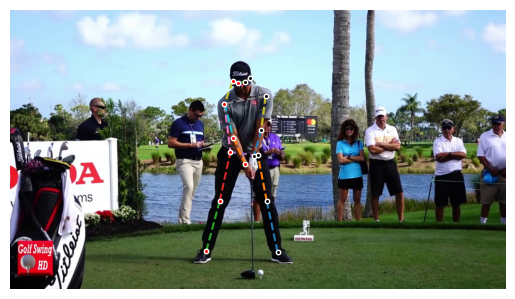

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageOps

frames = read_video(input_video_path, limit = 1)
cv2.imwrite("temp.jpg", cv2.cvtColor(list(frames)[0], cv2.COLOR_BGR2RGB))

keypoints_symmetry = [[1, 3, 5, 7, 9, 11, 13, 15], [2, 4, 6, 8, 10, 12, 14, 16]]
skeleton_layout = np.array([[16,14],[14,12],[17,15],[15,13],[12,13],[6,12],[7,13],[6,7], \
                  [6,8],[7,9],[8,10],[9,11],[2,3],[1,2],[1,3],[2,4],[3,5],[4,6],[5,7]])

keypoints_for_frame = keypoints_2d[0]

im = plt.imread('temp.jpg')
implot = plt.imshow(im)
plt.scatter(*keypoints_for_frame[keypoints_symmetry[0]].T, 10, color='black', edgecolors='white', zorder=10)
plt.scatter(*keypoints_for_frame[keypoints_symmetry[1]].T, 10, color='red', edgecolors='white', zorder=10)
for pair in skeleton_layout:
    plt.plot(*keypoints_for_frame[pair-1].T, linestyle = 'dashed')

plt.axis('off')
plt.show()

In [97]:
skeleton.parents(), poses['Reconstruction'].shape

(array([-1,  0,  1,  2,  0,  4,  5,  0,  7,  8,  9,  8, 11, 12,  8, 14, 15]),
 (239, 17, 3))

In [98]:
poses_for_frame = poses['Reconstruction'][0]
poses_for_frame.shape, poses_for_frame

((17, 3),
 array([[-4.07589596e-07, -9.54099960e-06,  8.36673558e-01],
        [ 1.23956189e-01, -3.61696631e-02,  8.48708510e-01],
        [ 2.66514003e-01,  1.36632621e-01,  4.80107307e-01],
        [ 3.70226264e-01,  1.21612430e-01,  5.96113801e-02],
        [-1.23957247e-01,  3.61631773e-02,  8.24583292e-01],
        [-9.43683237e-02,  2.80451357e-01,  4.73222375e-01],
        [-1.47323728e-01,  3.34894001e-01,  5.29508591e-02],
        [-3.30855697e-03,  4.41443473e-02,  1.05111670e+00],
        [ 6.55476823e-02,  1.45503104e-01,  1.27537334e+00],
        [ 1.17317066e-01,  2.24598527e-01,  1.30501699e+00],
        [ 1.18037269e-01,  1.83638632e-01,  1.40431535e+00],
        [-7.03407824e-02,  1.76354408e-01,  1.24542105e+00],
        [-6.48672879e-02,  2.04714328e-01,  9.83880043e-01],
        [ 9.86164063e-03,  2.35643998e-01,  7.67813325e-01],
        [ 1.89467624e-01,  1.18040085e-01,  1.20391965e+00],
        [ 1.82583973e-01,  2.03979209e-01,  9.33629751e-01],
        [ 1.40

In [149]:
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import subprocess as sp

def get_resolution(filename):
    """Returns height, width of video"""
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0',
               '-show_entries', 'stream=width,height', '-of', 'csv=p=0', filename]
    with sp.Popen(command, stdout=sp.PIPE, bufsize=-1) as pipe:
        for line in pipe.stdout:
            w, h = line.decode().strip().split(',')
            return int(w), int(h)
            
def get_fps(filename):
    """Returns the fps of the video"""
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0',
               '-show_entries', 'stream=r_frame_rate', '-of', 'csv=p=0', filename]
    with sp.Popen(command, stdout=sp.PIPE, bufsize=-1) as pipe:
        for line in pipe.stdout:
            a, b = line.decode().strip().split('/')
            return int(a) / int(b)

def read_video(filename, skip=0, limit=-1):
    """This function reads a video file and yields each frame as a numpy array in RGB format"""
    w, h = get_resolution(filename)
    
    command = ['ffmpeg',
            '-i', filename,
            '-f', 'image2pipe',
            '-pix_fmt', 'rgb24',
            '-vsync', '0',
            '-vcodec', 'rawvideo', '-']
    
    i = 0
    with sp.Popen(command, stdout = sp.PIPE, bufsize=-1) as pipe:
        while True:
            data = pipe.stdout.read(w*h*3)
            if not data:
                break
            i += 1
            if i > limit and limit != -1:
                continue
            if i > skip:
                yield np.frombuffer(data, dtype='uint8').reshape((h, w, 3))

In [150]:
plt.ioff() # turn off interactive mode
fig = plt.figure(figsize=(2*size, size)) # 6x6
ax_in = fig.add_subplot(1, 2, 1)
ax_in.get_xaxis().set_visible(False)
ax_in.get_yaxis().set_visible(False)
ax_in.set_axis_off()
ax_in.set_title('Input')

ax_3d = []
lines_3d = []
trajectories = []
radius = 1.7

poses = list(poses.values())

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(elev=15., azim=azim)
ax.set_xlim3d([-radius/2, radius/2])
ax.set_zlim3d([0, radius])
ax.set_ylim3d([-radius/2, radius/2])
try:
    ax.set_aspect('equal')
except NotImplementedError:
    ax.set_aspect('auto')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.dist = 7.5
ax.set_title("Reconstruction") #, pad=35
ax_3d.append(ax)
lines_3d.append([])
trajectories.append(poses[0][:, 0, [0, 1]])


# Decode video
if input_video_path is None:
    # Black background
    all_frames = np.zeros((keypoints.shape[0], viewport[1], viewport[0]), dtype='uint8')
else:
    # Load video using ffmpeg
    all_frames = []
    for f in read_video(input_video_path, skip=input_video_skip, limit=limit):
        all_frames.append(f)
    effective_length = min(keypoints.shape[0], len(all_frames))
    all_frames = all_frames[:effective_length]
    
    keypoints = keypoints[input_video_skip:] # todo remove
    for idx in range(len(poses)):
        poses[idx] = poses[idx][input_video_skip:]
    
    if fps is None:
        fps = get_fps(input_video_path)


initialized = False
image = None
lines = []
points = None

if limit < 1:
    limit = len(all_frames)
else:
    limit = min(limit, len(all_frames))

parents = skeleton.parents()
def update_video(i):
    # nonlocal initialized, image, lines, points
    global initialized, image, lines, points

    for n, ax in enumerate(ax_3d):
        ax.set_xlim3d([-radius/2 + trajectories[n][i, 0], radius/2 + trajectories[n][i, 0]])
        ax.set_ylim3d([-radius/2 + trajectories[n][i, 1], radius/2 + trajectories[n][i, 1]])

    # Update 2D poses
    joints_right_2d = keypoints_metadata['keypoints_symmetry'][1]
    colors_2d = np.full(keypoints.shape[1], 'black')
    colors_2d[joints_right_2d] = 'red'
    if not initialized:
        image = ax_in.imshow(all_frames[i], aspect='equal')
        
        for j, j_parent in enumerate(parents):
            if j_parent == -1:
                continue
                
            if len(parents) == keypoints.shape[1] and keypoints_metadata['layout_name'] != 'coco':
                # Draw skeleton only if keypoints match (otherwise we don't have the parents definition)
                lines.append(ax_in.plot([keypoints[i, j, 0], keypoints[i, j_parent, 0]],
                                        [keypoints[i, j, 1], keypoints[i, j_parent, 1]], color='pink'))

            col = 'red' if j in skeleton.joints_right() else 'black'
            for n, ax in enumerate(ax_3d):
                pos = poses[n][i]
                lines_3d[n].append(ax.plot([pos[j, 0], pos[j_parent, 0]],
                                            [pos[j, 1], pos[j_parent, 1]],
                                            [pos[j, 2], pos[j_parent, 2]], zdir='z', c=col))

        points = ax_in.scatter(*keypoints[i].T, 10, color=colors_2d, edgecolors='white', zorder=10)

        initialized = True
    else:
        image.set_data(all_frames[i])

        for j, j_parent in enumerate(parents):
            if j_parent == -1:
                continue
            
            if len(parents) == keypoints.shape[1] and keypoints_metadata['layout_name'] != 'coco':
                lines[j-1][0].set_data([keypoints[i, j, 0], keypoints[i, j_parent, 0]],
                                        [keypoints[i, j, 1], keypoints[i, j_parent, 1]])

            for n, ax in enumerate(ax_3d):
                pos = poses[n][i]
                lines_3d[n][j-1][0].set_xdata(np.array([pos[j, 0], pos[j_parent, 0]]))
                lines_3d[n][j-1][0].set_ydata(np.array([pos[j, 1], pos[j_parent, 1]]))
                lines_3d[n][j-1][0].set_3d_properties(np.array([pos[j, 2], pos[j_parent, 2]]), zdir='z')

        points.set_offsets(keypoints[i])
    
    print('{}/{}      '.format(i, limit), end='\r')
    

fig.tight_layout()

anim = FuncAnimation(fig, update_video, frames=np.arange(0, limit), interval=1000/fps, repeat=False)
if output.endswith('.mp4'):
    Writer = writers['ffmpeg']
    writer = Writer(fps=fps, metadata={}, bitrate=bitrate)
    anim.save(output, writer=writer)
elif output.endswith('.gif'):
    anim.save(output, dpi=80, writer='imagemagick')
else:
    raise ValueError('Unsupported output format (only .mp4 and .gif are supported)')
plt.close()

<ipython-input-150-71f0ce90c5ab>:28: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7.5
<ipython-input-150-71f0ce90c5ab>:122: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
